**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data files**

In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
for (txt in dir(fdiry)){cat(txt, "\n")}

peak.screened.active.tsv 
peak.screened.inactive.tsv 
peak.screened.total.tsv 
peak.summary.ccre_v3.tsv 
peak.summary.ccre_v4.tsv 
peak.summary.chipseq_histone.tsv 
peak.summary.chipseq_tf_subset.tsv 
peak.summary.chipseq_tf.tsv 
peak.summary.chromHMM.tsv 
peak.summary.crispri_growth.dhs.active.tsv 
peak.summary.crispri_hcrff.casa.tsv 
peak.summary.encode_e2g_benchmark.tsv 
peak.summary.encode_e2g_prediction.tsv 
peak.summary.enhancer_zscore_junke.ASTARR_A.tsv 
peak.summary.enhancer_zscore_junke.ASTARR_AB.tsv 
peak.summary.enhancer_zscore_junke.ASTARR_R.tsv 
peak.summary.enhancer_zscore_junke.ASTARR.tsv 
peak.summary.enhancer_zscore_junke.LMPRA_A.tsv 
peak.summary.enhancer_zscore_junke.LMPRA_AB.tsv 
peak.summary.enhancer_zscore_junke.LMPRA_R.tsv 
peak.summary.enhancer_zscore_junke.LMPRA.tsv 
peak.summary.enhancer_zscore_junke.STARRMPRA.tsv 
peak.summary.enhancer_zscore_junke.TMPRA_A.tsv 
peak.summary.enhancer_zscore_junke.TMPRA_R.tsv 
peak.summary.enhancer_zscore_junke.TMPRA.tsv 
peak.

## Import data

In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.total.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_total = dat
print(dim(dat))
head(dat)

[1] 740280      5


Chrom,Start,End,Peak,Assay_Type
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,ASTARR
chr1,100010437,100010915,chr1:100010437-100010915,ASTARR
chr1,10002087,10003910,chr1:10002087-10003910,ASTARR
chr1,100021298,100021629,chr1:100021298-100021629,ASTARR
chr1,100023727,100023976,chr1:100023727-100023976,ASTARR
chr1,100027983,100029702,chr1:100027983-100029702,ASTARR


In [4]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.active.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_active = dat
print(dim(dat))
head(dat)

[1] 111684      5


Chrom,Start,End,Peak,Assay_Type
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,100132370,100133575,chr1:100132370-100133575,ASTARR
chr1,100351002,100353319,chr1:100351002-100353319,ASTARR
chr1,100785473,100786391,chr1:100785473-100786391,ASTARR
chr1,101198203,101199537,chr1:101198203-101199537,ASTARR
chr1,1012902,1014502,chr1:1012902-1014502,ASTARR
chr1,10414831,10415758,chr1:10414831-10415758,ASTARR


In [5]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.inactive.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_inactive = dat
print(dim(dat))
head(dat)

[1] 293262      5


Chrom,Start,End,Peak,Assay_Type
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr1,938228,938505,chr1:938228-938505,ASTARR
chr1,965936,967556,chr1:965936-967556,ASTARR
chr1,1005089,1005593,chr1:1005089-1005593,ASTARR
chr1,1024158,1024602,chr1:1024158-1024602,ASTARR
chr1,1062264,1062778,chr1:1062264-1062778,ASTARR
chr1,1067955,1068196,chr1:1067955-1068196,ASTARR


## Summarize

In [9]:
dat = dat_peak_total
lst = split(dat$Peak, dat$Assay_Type)
lst_txt_peak_total = lst

dat = dat_peak_active
lst = split(dat$Peak, dat$Assay_Type)
lst_txt_peak_active = lst

dat = dat_peak_inactive
lst = split(dat$Peak, dat$Assay_Type)
lst_txt_peak_inactive = lst

**Check**

In [13]:
vec_txt_assay = names(lst_txt_peak_total)
print(vec_txt_assay)

for (txt_assay in vec_txt_assay) {
    vec_txt_peak_total    = lst_txt_peak_total[[txt_assay]]
    vec_txt_peak_active   = lst_txt_peak_active[[txt_assay]]
    vec_txt_peak_inactive = lst_txt_peak_inactive[[txt_assay]]
    
    cat(txt_assay, "\n")
    res = vec_txt_peak_active %in% vec_txt_peak_total
    cat("Active:  ", all(res), "\n")
    res = vec_txt_peak_inactive %in% vec_txt_peak_total
    cat("Inactive:", all(res), "\n")
    cat("\n")
}

[1] "ASTARR"                "CRISPRi-Growth"        "CRISPRi-HCRFF"        
[4] "ENCODE-E2G_Benchmark"  "ENCODE-E2G_Prediction" "LMPRA"                
[7] "TMPRA"                 "WSTARR"               
ASTARR 
Active:   TRUE 
Inactive: TRUE 

CRISPRi-Growth 
Active:   FALSE 
Inactive: TRUE 

CRISPRi-HCRFF 
Active:   TRUE 
Inactive: TRUE 

ENCODE-E2G_Benchmark 
Active:   TRUE 
Inactive: TRUE 

ENCODE-E2G_Prediction 
Active:   TRUE 
Inactive: TRUE 

LMPRA 
Active:   FALSE 
Inactive: TRUE 

TMPRA 
Active:   FALSE 
Inactive: FALSE 

WSTARR 
Active:   TRUE 
Inactive: TRUE 



## Analysis

In [27]:
vec_txt_assay = names(lst_txt_peak_total)

lst = lapply(vec_txt_assay, function(txt_assay){
    vec_txt_peak_total    = lst_txt_peak_total[[txt_assay]]
    vec_txt_peak_active   = lst_txt_peak_active[[txt_assay]]
    vec_txt_peak_inactive = lst_txt_peak_inactive[[txt_assay]]
    
    vec = vec_txt_peak_total %in% vec_txt_peak_active
    res = c(txt_assay, sum(vec), length(vec), mean(vec))
    names(res) = c("Assay", "Count_Active", "Count_Total", "Freq_Active")
    return(res)
})
    
dat = bind_rows(lst)
dat = dat %>% 
    dplyr::mutate(
        Count_Active = as.integer(Count_Active),
        Count_Total  = as.integer(Count_Total),
        Freq_Active  = as.double(Freq_Active)
    ) %>%
    dplyr::mutate(
        Count_Label = ifelse(
            Count_Total > 1000, 
            paste0(round(Count_Total / 1000), "K"),
            Count_Total
        )
    ) %>%
    dplyr::mutate(
        Assay_Label = paste0(Assay, " (", Count_Label, ")")
    )

dat_peak_isActive = dat
dat

Assay,Count_Active,Count_Total,Freq_Active,Count_Label,Assay_Label
<chr>,<int>,<int>,<dbl>,<chr>,<chr>
ASTARR,7427,246850,0.03008710,247K,ASTARR (247K)
CRISPRi-Growth,4602,80288,0.05731865,80K,CRISPRi-Growth (80K)
CRISPRi-HCRFF,54,1330,0.04060150,1K,CRISPRi-HCRFF (1K)
ENCODE-E2G_Benchmark,385,3195,0.12050078,3K,ENCODE-E2G_Benchmark (3K)
ENCODE-E2G_Prediction,40892,91787,0.44550971,92K,ENCODE-E2G_Prediction (92K)
LMPRA,31760,68420,0.46419176,68K,LMPRA (68K)
TMPRA,1053,1722,0.61149826,2K,TMPRA (2K)
WSTARR,30478,246688,0.12354877,247K,WSTARR (247K)


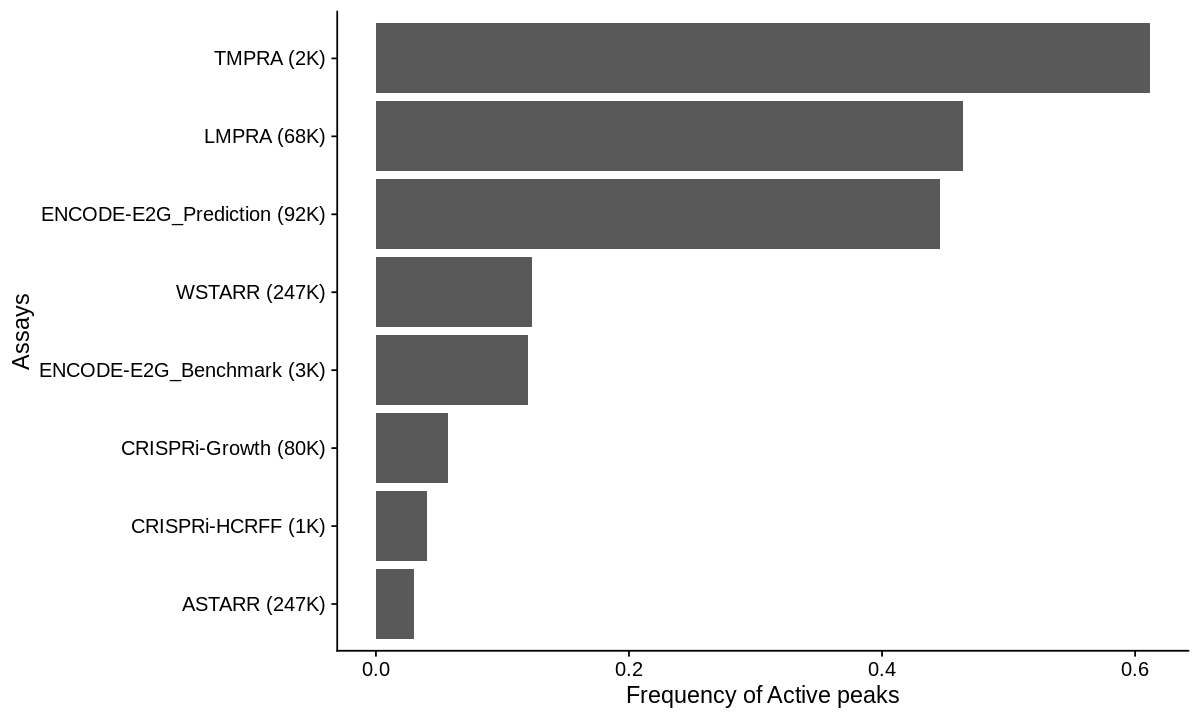

In [29]:
dat = dat_peak_isActive
dat = dat %>% 
    dplyr::arrange(Freq_Active) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Freq_Active, y=Assay_Label)) + 
    geom_col() + 
    labs(x="Frequency of Active peaks", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)